In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import csv

In [2]:
df = pd.read_csv('vk_data/vk_matrix_1.csv', index_col='Name')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 1875 entries, Артём Эйдик to Egor Walther
Columns: 1875 entries, Артём Эйдик to Egor Walther
dtypes: float64(1875)
memory usage: 26.8+ MB


,Артём Эйдик,Александр Поповкин,Михаил Лукин,Дмитрий Королёв,Светлана Нагинская,Виктория Кузьмичева,Марина Долбилина,Александр Пучков,Юлия Сокова,Иван Кудряшов,...,Василиса Белоусова,Ирина Родина,傅 鄭良,White Shadow,Светлана Данчина.1,Ольга Иванова,Eliza Granevich,Маргарита Пак,Влад Кузнецов,Egor Walther
Name,,,,,,,,,,,,,,,,,,,,,
Артём Эйдик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Александр Поповкин,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Михаил Лукин,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Дмитрий Королёв,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Светлана Нагинская,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ольга Иванова,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eliza Granevich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Маргарита Пак,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
names = df.columns
data = np.array(df)
data.shape

(1875, 1875)

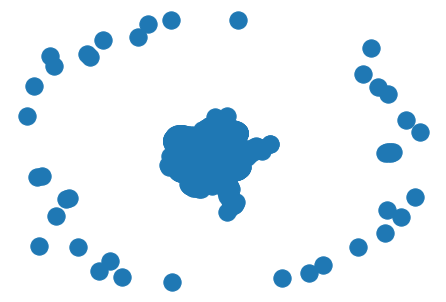

In [4]:
G = nx.from_numpy_matrix(data)
nx.draw(G)

In [5]:
n = len(data)
max_between_centr_i = 0
between_centr = []
with open('vk_data/Степень посредничества.txt','w',encoding="utf-8") as f:  # открытие в режиме записи
    for i, w in nx.betweenness_centrality(G).items():
        #print (names[i], round(w,4))
        w_1 = round(w,4)
        s = names[i] + " " + str(w_1) + "\n"
        f.write(s)
        between_centr.append(w)

In [6]:
for idx in np.argsort(-np.array(between_centr))[:10]:
    print(names[idx], between_centr[idx])

Арина Воробьёва 0.2996185184345399
Даня Еремеев 0.22849744921486445
Эка Романадзе 0.21468726569943375
Надежда Чернева 0.15389034320343023
Rinat Mirzagalamov 0.1237021626836853
Артем Абдуллаев 0.12171341612712198
Иван Олейников 0.12107145079927976
Анна Макарова 0.10179229176892844
Лёша Мохов 0.0962813455777165
Никита Потебня 0.054988011963246944
